## 6.2 Exploring Relationships

#### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Defining Path
path=r'/Users/marieanek2/Documents/Youtube Trending Analysis'

In [3]:
# Importing Data set

df= pd.read_csv(os.path.join(path,'02 Data','Prepared Data','ALLvideos.csv'),index_col = False)

In [4]:
df.head()

,Unnamed: 0,country,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,US,CaseyNeistat,22,748374,57527,2966,15954,False,False,False
1,1,US,LastWeekTonight,24,2418783,97185,6146,12703,False,False,False
2,2,US,Rudy Mancuso,23,3191434,146033,5339,8181,False,False,False
3,3,US,Good Mythical Morning,24,343168,10172,666,2146,False,False,False
4,4,US,nigahiga,24,2095731,132235,1989,17518,False,False,False


In [5]:
df.shape

(304023, 11)

#### Exploring Relationships

In [6]:
df.corr()

,Unnamed: 0,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
Unnamed: 0,1.000000,-0.019264,0.079140,0.077160,0.013040,0.041366,-0.024942,-0.019232,0.014798
category_id,-0.019264,1.000000,-0.134879,-0.152487,-0.030926,-0.068699,0.031247,0.006842,-0.023914
views,0.079140,-0.134879,1.000000,0.779475,0.416920,0.503400,-0.007102,-0.008513,0.008699
likes,0.077160,-0.152487,0.779475,1.000000,0.453028,0.787795,-0.029492,-0.031336,0.006736
dislikes,0.013040,-0.030926,0.416920,0.453028,1.000000,0.715343,-0.008496,-0.012945,0.006203
comment_count,0.041366,-0.068699,0.503400,0.787795,0.715343,1.000000,-0.026383,-0.020001,0.003007
comments_disabled,-0.024942,0.031247,-0.007102,-0.029492,-0.008496,-0.026383,1.000000,0.293254,-0.003875
ratings_disabled,-0.019232,0.006842,-0.008513,-0.031336,-0.012945,-0.020001,0.293254,1.000000,-0.003369
video_error_or_removed,0.014798,-0.023914,0.008699,0.006736,0.006203,0.003007,-0.003875,-0.003369,1.000000


#### Visualizations

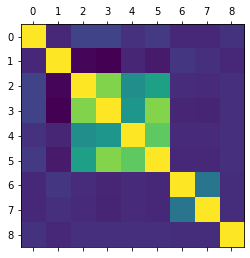

In [7]:
#correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

#### Plotting Heatmaps for the correlation 

In [8]:
NumData=df[['views', 'likes', 'dislikes','comment_count']]

<AxesSubplot:>

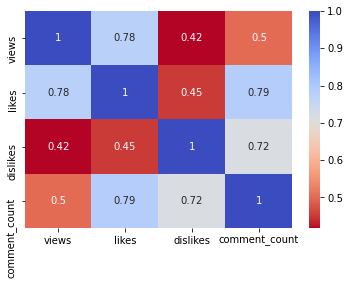

In [9]:
sns.heatmap(NumData.corr(),annot=True,cmap='coolwarm_r')

**The likes and view, likes and comment_count, and dislike and comment_count are correlated to each other**

<AxesSubplot:xlabel='likes', ylabel='comment_count'>

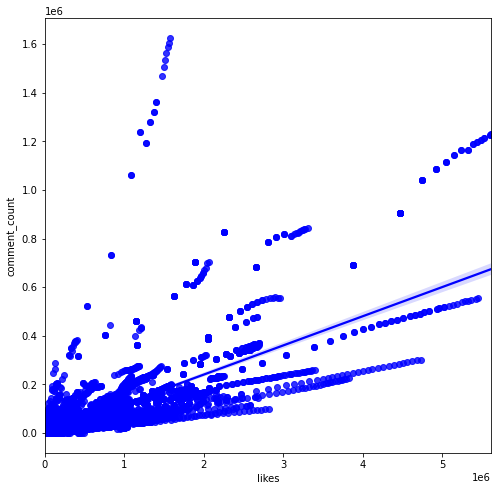

In [10]:
# Reg plot between likes and comment_count
plt.figure(figsize=(8,8))
sns.regplot(x='likes',y='comment_count',data=df,color='blue')

<AxesSubplot:xlabel='dislikes', ylabel='comment_count'>

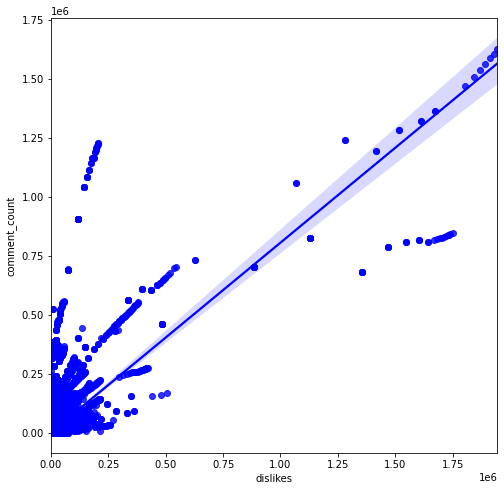

In [11]:
# Reg plot between dislikes and comment_count
plt.figure(figsize=(8,8))
sns.regplot(x='dislikes',y='comment_count',data=df,color='blue')

<AxesSubplot:xlabel='views', ylabel='likes'>

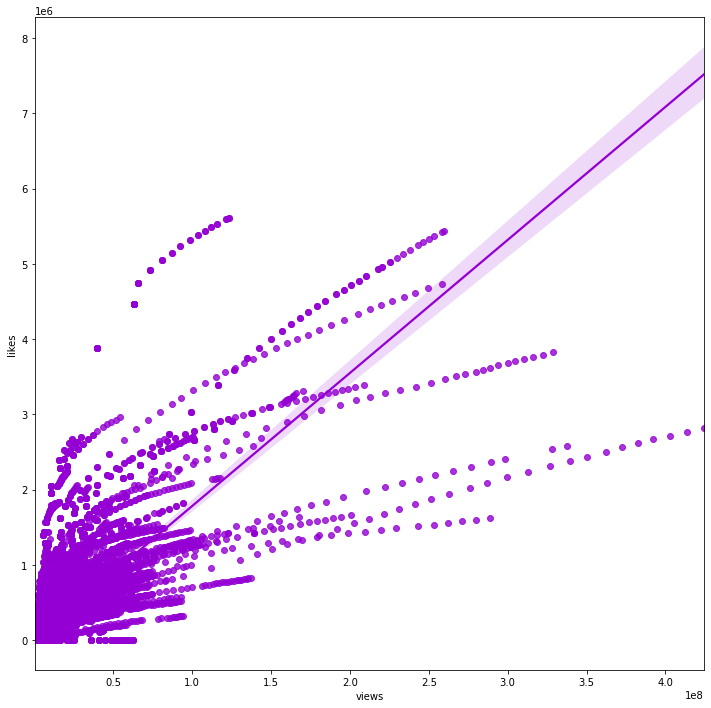

In [12]:
# Reg plot between views and likes
plt.figure(figsize=(12,12))
sns.regplot(x='views',y='likes',data=df,color='darkviolet')

<AxesSubplot:xlabel='views', ylabel='likes'>

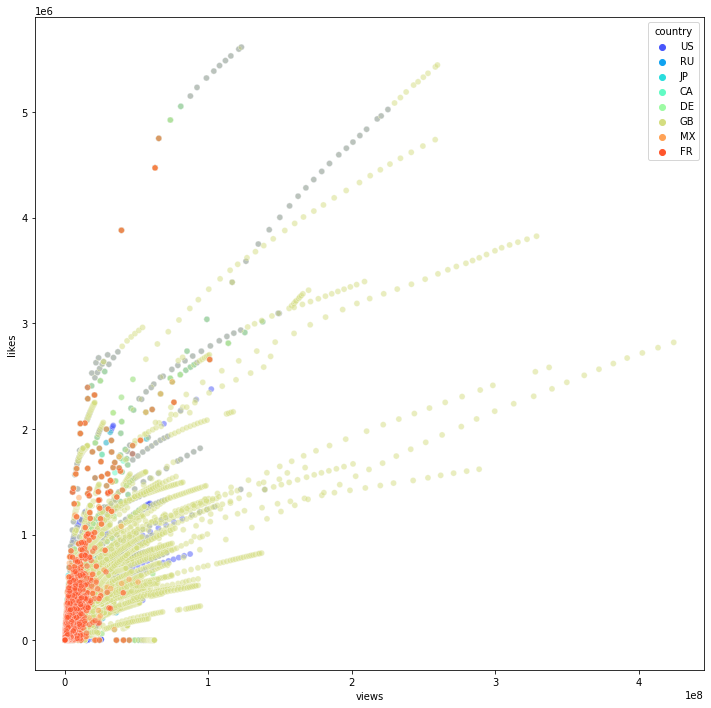

In [13]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='views',y='likes',data=df,hue='country',alpha=.5,palette='rainbow')

<AxesSubplot:xlabel='views', ylabel='dislikes'>

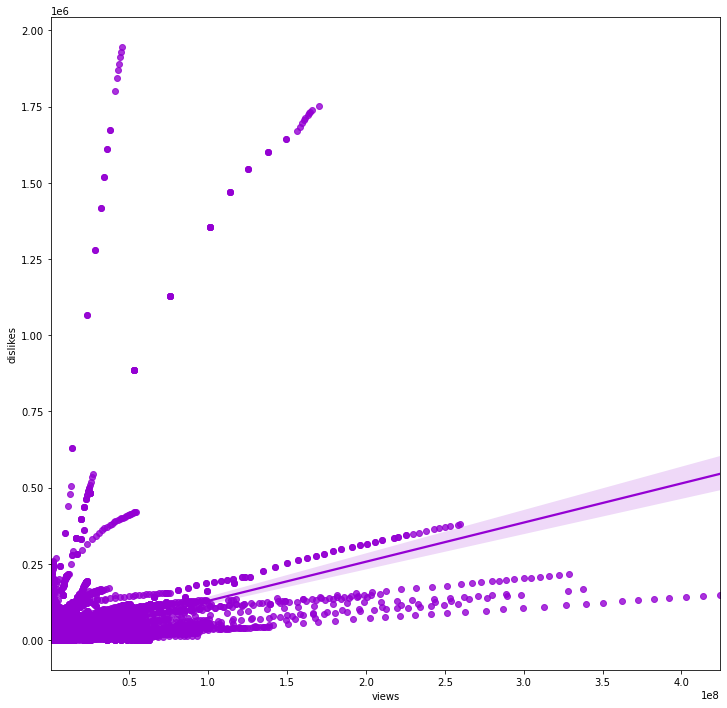

In [14]:
# Reg plot between views and dislikes
plt.figure(figsize=(12,12))
sns.regplot(x='views',y='dislikes',data=df,color='darkviolet')

 Likes are linearly related to the numbers of views but dislikes are less correlated to the number of views

<AxesSubplot:xlabel='likes', ylabel='Density'>

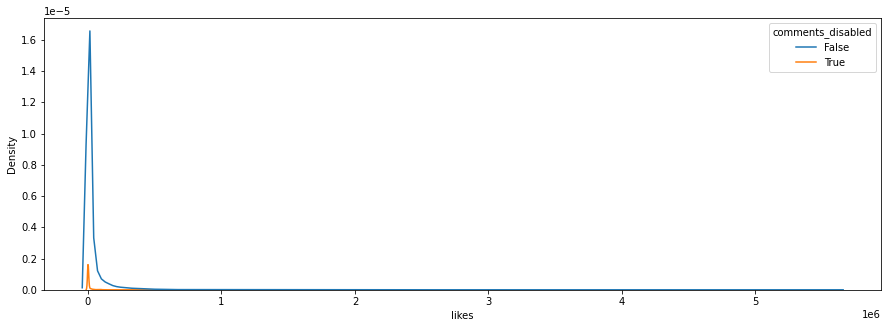

In [15]:
plt.figure(figsize=(15,5))
sns.kdeplot(x='likes',data=df,hue='comments_disabled',alpha=0.5)

<AxesSubplot:xlabel='likes', ylabel='Density'>

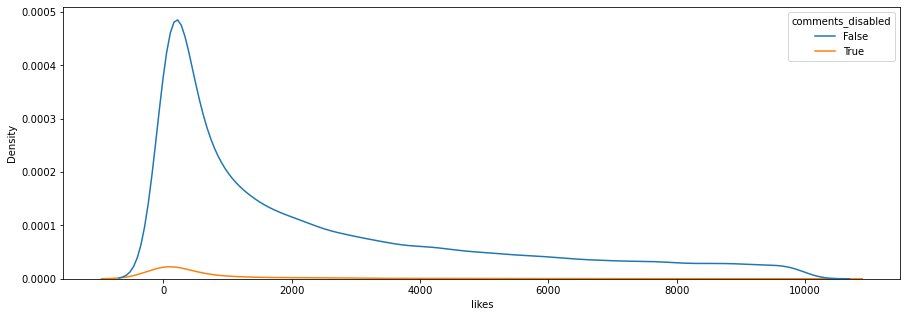

In [16]:
#Enlarged view of the above plot
plt.figure(figsize=(15,5))
sns.kdeplot(x='likes',data=df[df['likes']<10000],hue='comments_disabled',alpha=0.5)

<AxesSubplot:xlabel='dislikes', ylabel='Density'>

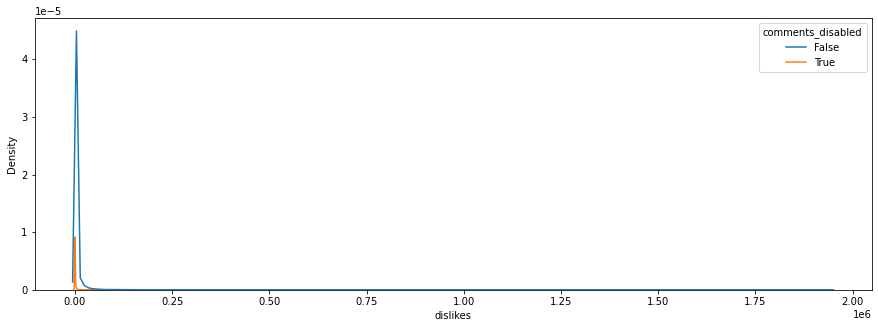

In [17]:
plt.figure(figsize=(15,5))
sns.kdeplot(x='dislikes',data=df,hue='comments_disabled',alpha=0.5)

 No significant proof that like and dislikes are depend on comments disabled

### The strongest corellation is between the views and likes. the higher the views the higher the likes.Also, the more the views the more the comments_count

### 5.Create pairplot of the entire data set

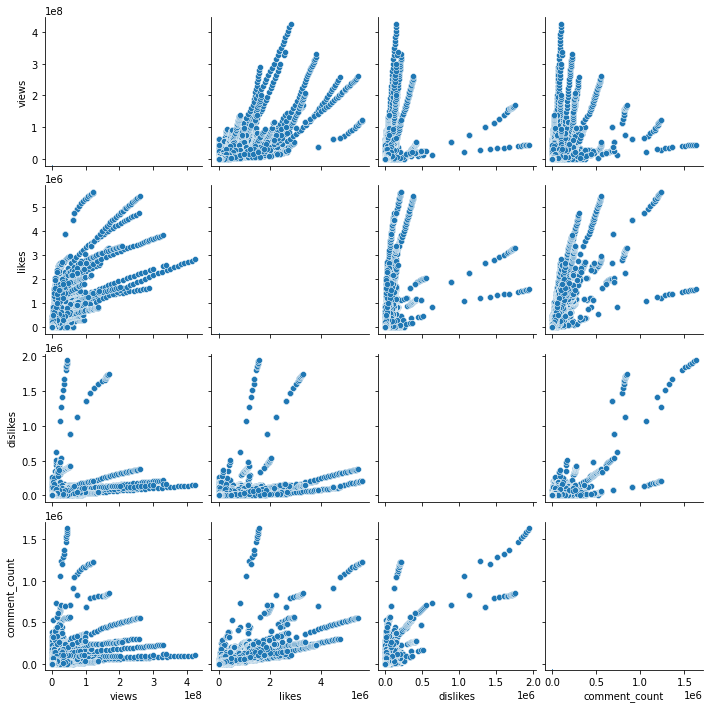

In [18]:
sns.pairplot(NumData)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

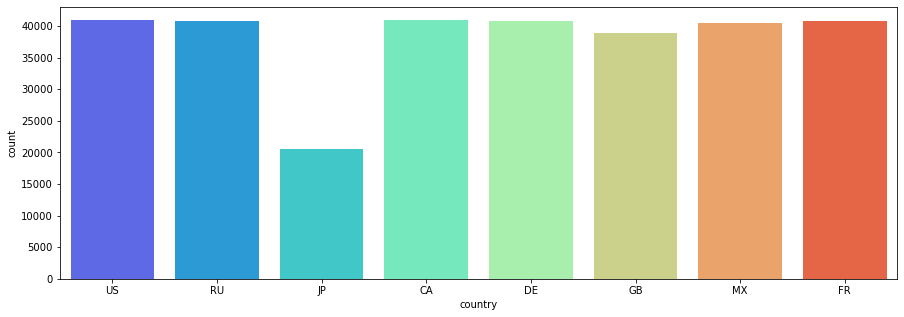

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(df['country'],palette='rainbow')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category_id', ylabel='count'>

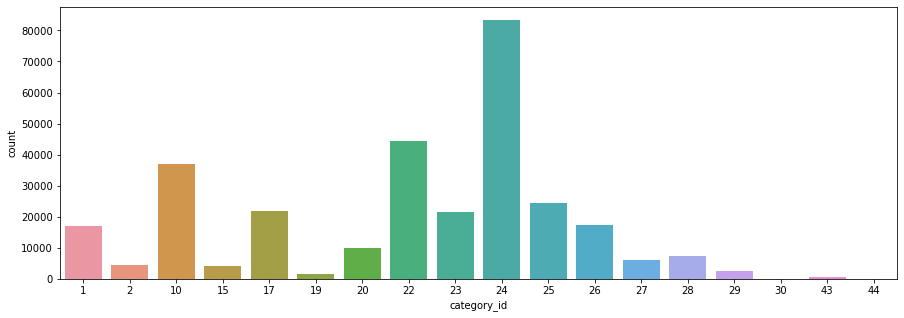

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(df['category_id'])

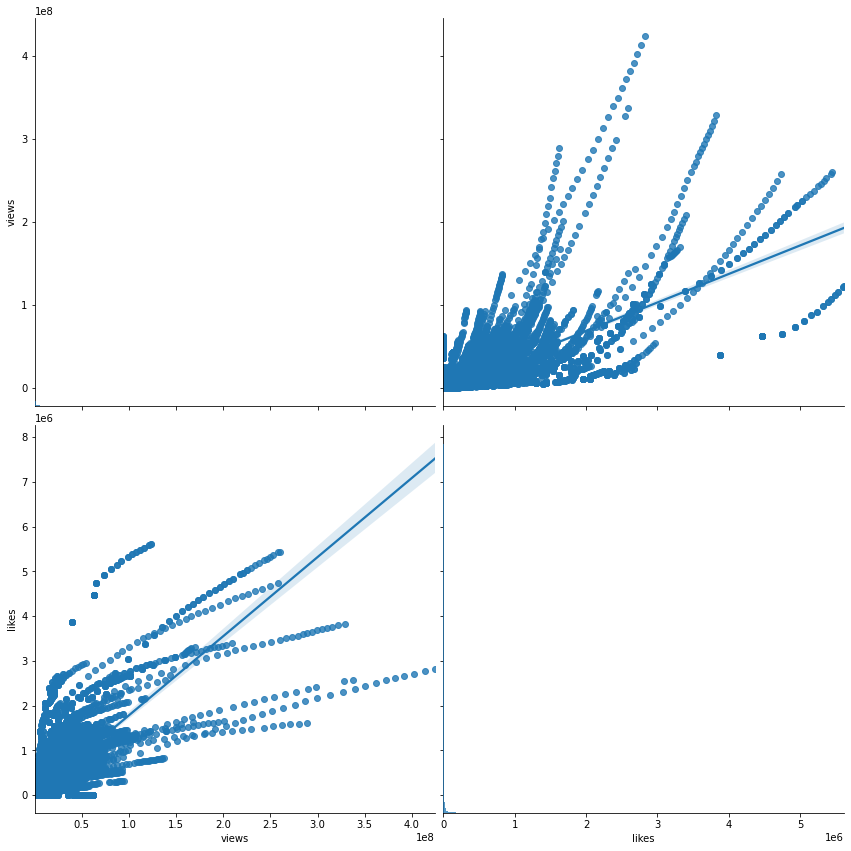

In [21]:
#matplotlib.pyplot.figure(figsize=(8,8))
sns.pairplot(NumData[['views', 'likes']], kind='reg',height=6);

### Answering Questions in 6.1
###### 1. The number of views , likes and comments determine a trending video
###### 2. Yes, there is a correlation between the likes and the number of views
###### 3. Most videos with comments disabled have more likes

### Notes
##### The dependent variable (likes) must be linear with other independent *num_variables (views, dislikes, comment_count)

